In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt

여기서 특히 주목해야 할 부분은 tf.reset_default_graph()  인데, 주피터 노트북과 같은 환경에서 실행을 하게 되면, 주피터 커널을 리스타트하지 않는 이상 변수들의 컨택스트가 그대로 유지 되기 때문에, 위의 코드를 같은 커널에서 tf.reset_default_graph() 없이, 두 번 이상 실행하게 되면 에러가 난다. 그 이유는 텐서플로우 그래프를 만들어놓고, 그 그래프가 지워지지 않은 상태에서 다시 같은 그래프를 생성하면서 나오는 에러인데, tf.reset_default_graph() 메서드는 기존에 생성된 디폴트 그래프를 모두 삭제해서 그래프가 중복되는 것을 막아준다. 일반적인 파이썬 코드에서는 크게 문제가 없지만, 컨택스트가 계속 유지되는 주피터 노트북 같은 경우에는 발생할 수 있는 문제이니, 반드시 디폴트 그래프를 리셋해주도록 하자


출처: http://bcho.tistory.com/1156 [조대협의 블로그]

In [2]:
tf.reset_default_graph()

def parser(serialized_example):
    feature = {
        'age': tf.FixedLenFeature([1], tf.int64),#Configuration for parsing a fixed-length input feature.
        'img': tf.FixedLenFeature([61*49], tf.int64) ## 61*49 픽셀
    }
    
    parsed_feature = tf.parse_single_example(serialized_example, feature)
    age = tf.cast(parsed_feature['age'], tf.int32)## one-hot 으로 바꿔야 하므로 intiger
    img = tf.cast(parsed_feature['img'], tf.float32)## imgage는 실수형
    
    return age, img

In [3]:
## 데이터셋 train 불러오기 
dataset_dir = 'cnn_dataset/face_train.tfrecord'
dataset = tf.contrib.data.TFRecordDataset(dataset_dir).map(parser)
dataset = dataset.batch(32)
dataset = dataset.shuffle(7777)

Instructions for updating:
Use `tf.data.TFRecordDataset`.


In [4]:
itr = dataset.make_one_shot_iterator()
age, img = itr.get_next()

(32, 1)
(32, 2989)
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [1]
 [1]
 [2]
 [2]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [2]
 [2]
 [2]
 [1]]


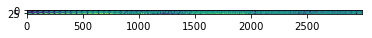

In [5]:
with tf.Session() as sess:
    _age,_img = sess.run([age,img])## fetch는 한개 
    print(_age.shape)##(32, 1)
    print(_img.shape)## (32, 2989) 61*49픽셀 = 2989
    print(_age)
    plt.imshow(_img)
    plt.show()